## $\color{red}{\text{ODE}}$

## $\color{blue}{\frac{dy}{dt}=f(t, y)}$

## 1. Euler's method
## $y_{k+1} \approx y_k + y'(t_k, y_k)(t_{k+1}-t_k)$

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def dy(t, y):
    return .5 * (t-y)

def dy2(t, y):
    return t**.5

def exact_y(t, y0):
    return (y0 + 2.) * np.exp(-.5 * t) - 2. + t

def Euler(func, a, b, n, y0):
    t = np.linspace(a, b, n)
    h = (b-a) / (n-1)
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(len(y)-1):
        y[i+1] = y[i] + dy(t[i], y[i]) * h
    return t, y
def plot_compare(t, sol, es):
    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    for (i, s) in enumerate(sol):
        plt.plot(t, s[0], lw=5-i*0.75, label=s[1])
    plt.plot(t, es, lw=2, label='Exact')
    plt.xlabel('t', fontsize=15); plt.ylabel('y', fontsize=15)
    plt.grid(); plt.legend(fontsize=13)
    plt.subplot(122)
    for (i, s) in enumerate(sol):
        plt.semilogy(t, abs(s[0]-es), lw=5-i*0.75, label=s[1])
    plt.xlabel('t', fontsize=15); plt.ylabel('error', fontsize=15)
    plt.legend(fontsize=13); plt.grid(); plt.show()

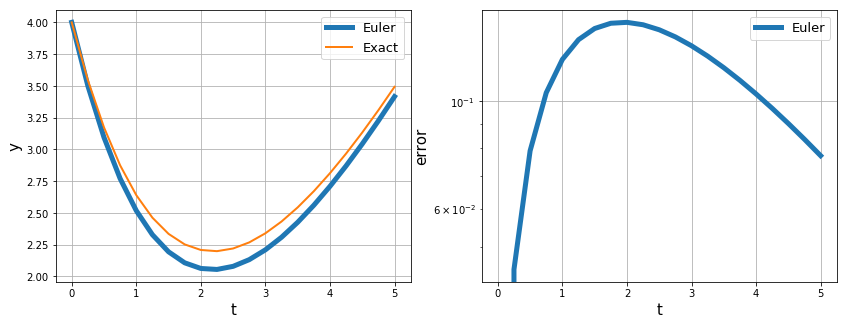

In [79]:
a = 0; b = 5; y0 = 4; n = 21
t, s = Euler(dy2, a, b, n, y0)
es = exact_y(t, y0)
sol = [[s, 'Euler']]
plot_compare(t, sol, es)

***
## 2. Heun's method
## $y_{k+1}=y_k + \int_{t_k}^{t_{k+1}}f(t, y(t))dt$
## $y_{k+1}\approx y_k + \frac{t_{k+1}-t_k}{2}(f(t_k, y_k)+f(t_{k+1}, y_{k+1}))$
## Approximating $y_{k+1}$: $y_{k+1}\approx y_k+f(t_k, y_k)(t_{k+1}-t_k)$
## $y_{k+1}\approx y_k + \frac{t_{k+1}-t_k}{2}(f(t_k, y_k)+f(t_{k+1}, y_k+f(t_k, y_k)(t_{k+1}-t_k)))$

In [32]:
def Heun(dy, a, b, n, y0):
    t = np.linspace(a, b, n)
    h = (b-a)  / (n-1)
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(len(y)-1):
        y[i+1] = y[i] + h*(dy(t[i], y[i])+dy(t[i+1], y[i]+dy(t[i], y[i])*h))/2
    return t, y

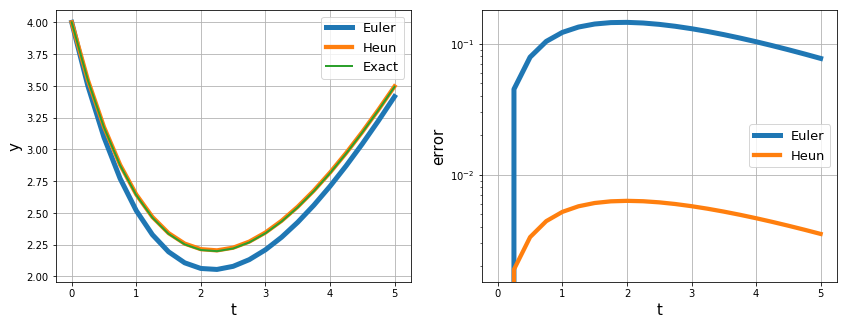

In [78]:
a = 0; b = 5; y0 = 4; n = 21
t, s1 = Euler(dy, a, b, n, y0)
_, s2 = Heun(dy, a, b, n, y0)
sol = [[s1, 'Euler'], [s2, 'Heun']]
plot_compare(t, sol, exact_y(t, y0))

***
## 3. Taylor's method
## $y_{k+1} = y_k + hy_k'+\frac{h^2}{2}y_k''+\frac{h^3}{3!}y_k'''+\cdots$

### Here, let $y'=f(t, y) = \frac{t-y}{2}$
## $y''=\frac{\partial f}{\partial t}+f\frac{\partial f}{\partial y}=\frac{1}{-2}(f-1)$
## $y''' = \frac{1}{(-2)^2}(f-1)$
## $y^{(n)} = \frac{1}{(-2)^{n-1}}(f-1), \ n \ge 2$
## $y^{(n)} = \frac{1}{-2}y^{(n-1)}, \ n \ge 3$


In [34]:
from functools import reduce

def dy_order(dy, t, y, order):
    df = np.empty(order)
    df[0] = dy(t, y); df[1] = (df[0]-1) / (-2)
    for i in range(2, order):
        df[i] = df[i-1] / (-2)
    return df

def Taylor(dy, a, b, n, y0, order=3):
    t = np.linspace(a, b, n); h = (b-a) / (n-1)
    y = np.zeros_like(t); y[0] = y0
    for i in range(n-1):
        df = dy_order(dy, t[i], y[i], order)
        tmp = 1
        for j in range(order):
            tmp *= (h/(j+1))
            y[i+1] += tmp * df[j]
        y[i+1] += y[i]
    return t, y 

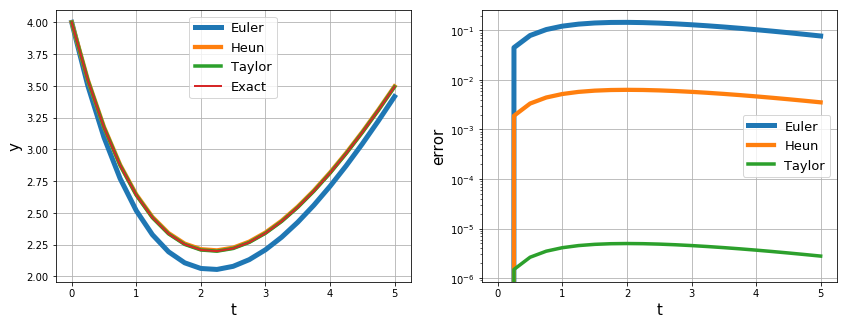

In [39]:
a = 0; b = 5; y0 = 4; n = 21
t, s1 = Euler(dy, a, b, n, y0)
_, s2 = Heun(dy, a, b, n, y0)
_, s3 = Taylor(dy, a, b, n, y0, order=4)
sol = [[s1, 'Euler'], [s2, 'Heun'], [s3, 'Taylor']]
plot_compare(t, sol, exact_y(t, y0))

***
## 4. Runge-Kutta Methods
### 4.1 Second-order
$$
\large{
\left \{
\begin{aligned}
    y(t_{k+1}) &= y(t_k) + \int_{t_k}^{t_{k+1}}f(t, y(t))dt\\
    y(t_k+\frac{h}{2}) &= y(t_k) + \frac{h}{2}f(t_k, y(t_k))\\
    y(t_{k+1}) &= y(t_k) + hf(t_k+\frac{h}{2}, y(t_k+\frac{h}{2}))
\end{aligned}
\right. 
}
$$

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def Runge_Kutta_2(dy, a, b, n, y0):
    t = np.linspace(a, b, n)
    h = t[1] - t[0]
    y = np.empty_like(t)
    y[0] = y0
    for i in range(n-1):
        k1 = .5 * h * dy(t[i], y[i])
        k2 = h * dy(t[i]+.5*h, y[i]+k1)
        y[i+1] = y[i] + k2
    return t, y

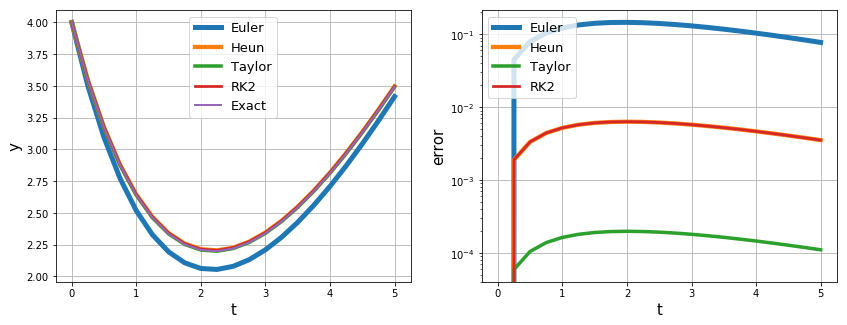

In [44]:
a = 0; b = 5; y0 = 4; n = 21
t, s1 = Euler(dy, a, b, n, y0)
_, s2 = Heun(dy, a, b, n, y0)
_, s3 = Taylor(dy, a, b, n, y0, order=3)
_, s4 = Runge_Kutta_2(dy, a, b, n, y0)
sol = [[s1, 'Euler'], [s2, 'Heun'], [s3, 'Taylor'], [s4, 'RK2']]
plot_compare(t, sol, exact_y(t, y0))

#### 4.2 Fourth-order Runge-Kutta
$$
\large{
\left \{
\begin{aligned}
    y(t_{k+1}) &= y(t_k) + \int_{t_k}^{t_{k+1}}f(t, y(t))dt\\
    f_0 &= f(t_k, y(t_k))\\
    y(t_k+\frac{h}{2}) &\approx y(t_k) + \frac{h}{2}f_0\\
    f_1 &= f(t_k+\frac{h}{2}, y(t_k+\frac{h}{2}))\\
    y(t_{k+1}) &\approx y(t_k) + hf_1\\
    f_2 &= f(t_{k+1}, y(t_{k+1}))\\
    \boxed{\text{Simpson's rule: }} \ y(t_{k+1}) &\approx y(t_k)+\frac{h}{6}(f_0+4f_1+f_2)\\
    &\boxed{\text{To reduce error:}} \\
    f2 &= f(t_{k}+\frac{h}{2}, y(t_k)+\frac{h}{2}f_1)\\
    f3 &= f(t_{k+1}, y(t_k)+hf2)\\
    y(t_{k+1}) &\approx y(t_k) + \frac{h}{6}[f_0+2(f_1+f_2)+f_3]
\end{aligned}
\right.
}
$$

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def Runge_Kutta_41(dy, a, b, n, y0):
    t = np.linspace(a, b, n)
    h = t[1] - t[0]
    y = np.empty_like(t)
    y[0] = y0
    for i in range(n-1):
        k1 = h * dy(t[i], y[i])
        k2 = h * dy(t[i]+.5*h, y[i]+.5*k1)
        k3 = h * dy(t[i+1], y[i]+k2)
        y[i+1] = y[i] + (k1 + 4*k2 + k3) / 6
    return t, y
def Runge_Kutta_42(dy, a, b, n, y0):
    t = np.linspace(a, b, n)
    h = t[1] - t[0]
    y = np.empty_like(t)
    y[0] = y0
    for i in range(n-1):
        k1 = h * dy(t[i], y[i])
        k2 = h * dy(t[i]+.5*h, y[i]+.5*k1)
        k3 = h * dy(t[i]+.5*h, y[i]+.5*k2)
        k4 = h * dy(t[i+1], y[i]+k3)
        y[i+1] = y[i] + (k1 + 2*(k2+k3) + k4) / 6
    return t, y

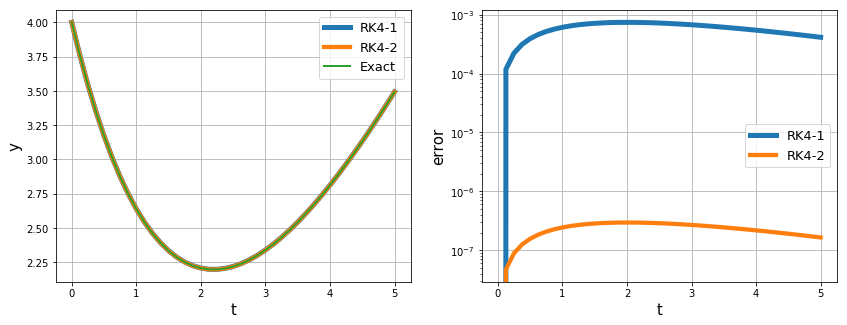

In [74]:
a = 0; b = 5; y0 = 4; n = 41
t, s1 = Runge_Kutta_41(dy, a, b, n, y0)
_, s2 = Runge_Kutta_42(dy, a, b, n, y0)
sol = [[s1, 'RK4-1'], [s2, 'RK4-2']]
plot_compare(t, sol, exact_y(t, y0))

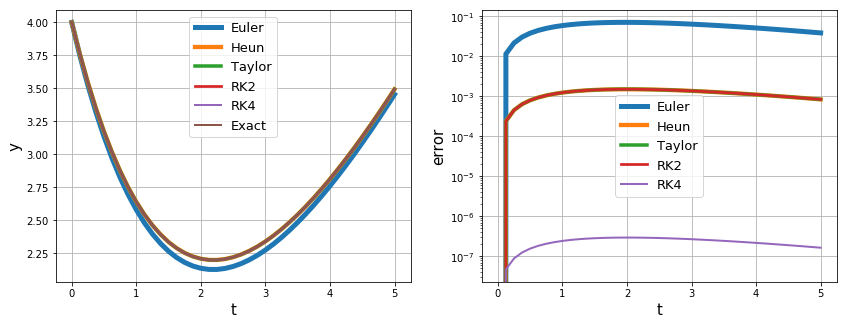

In [76]:
a = 0; b = 5; y0 = 4; n = 41
t, s1 = Euler(dy, a, b, n, y0)
_, s2 = Heun(dy, a, b, n, y0)
_, s3 = Taylor(dy, a, b, n, y0, order=2)
_, s4 = Runge_Kutta_2(dy, a, b, n, y0)
_, s5 = Runge_Kutta_42(dy, a, b, n, y0)
sol = [[s1, 'Euler'], [s2, 'Heun'], [s3, 'Taylor'], [s4, 'RK2'], [s5, 'RK4']]
plot_compare(t, sol, exact_y(t, y0))

***
## 5. Predictor-Corrector methods
$$
\large{
\left \{
\begin{aligned}
    y(t_{k+1}) &= y(t_k) + \int_{t_k}^{t_{k+1}}f(t, y(t))dt\\
    & \boxed{\text{Rough }y(t_{k+1}): \ p}\\
    & \boxed{\text{Lagrangian polynomial extrapolation}}\\
    p &= y(t_k) + \frac{h}{24}(-9f_{k-3}+37f_{k-2}-59f_{k-1}+55f_k) \\
    f_{k+1} &= f(t_{k+1}, p)\\
    & \boxed{\text{Lagrangian polynomial extrapolation}}\\
    y(t_{k+1}) &\approx y(t_k) + \frac{h}{24}(f_{k-2}-5f_{k-1}+19f_k+9f_{k+1})\\
    & \boxed{\text{Error estimate:}}\\
    \epsilon_{k+1} &= -\frac{19}{270}(y(t_{k+1})-p)
\end{aligned}
\right.
}
$$

In [103]:
import numpy as np
import matplotlib.pyplot as plt

def pre_cor(dy, a, b, n, y0):
    t = np.linspace(a, b, n)
    h = t[1] - t[0]; y = np.empty_like(t)
    _, y[: 4] = Runge_Kutta_42(dy, a, a+3*h, 4, y0)
    f1 = np.array([-9, 37, -59, 55]) / 24
    f2 = np.array([1, -5, 19, 9]) / 24
    f = np.empty(4)
    for i in range(4):
        f[i] = dy(t[i], y[i])
    for i in range(3, n-1):
        p = y[i] + h * np.dot(f1, f)
        f[:3] = f[1:]
        f[-1] = dy(t[i+1], p)
        y[i+1] = y[i] + h * np.dot(f2, f)
        f[-1] = dy(t[i+1], y[i+1])
    return t, y

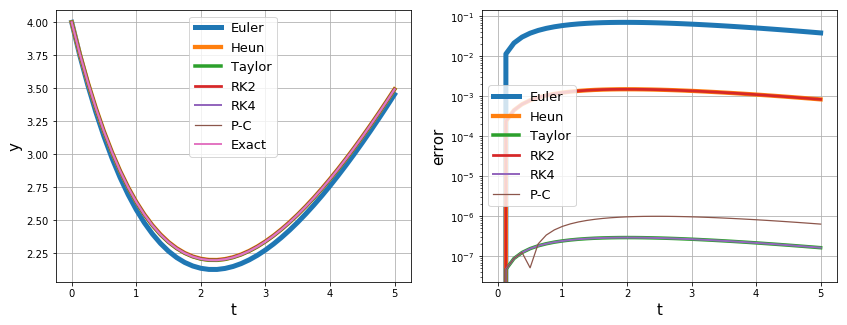

In [104]:
a = 0; b = 5; y0 = 4; n = 41
t, s1 = Euler(dy, a, b, n, y0)
_, s2 = Heun(dy, a, b, n, y0)
_, s3 = Taylor(dy, a, b, n, y0, order=4)
_, s4 = Runge_Kutta_2(dy, a, b, n, y0)
_, s5 = Runge_Kutta_42(dy, a, b, n, y0)
_, s6 = pre_cor(dy, a, b, n, y0)
sol = [[s1, 'Euler'], [s2, 'Heun'], [s3, 'Taylor'],
       [s4, 'RK2'], [s5, 'RK4'], [s6, 'P-C']]
plot_compare(t, sol, exact_y(t, y0))